# DecisionTreeRegression on Titanic Dataset

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline
plt.style.use('ggplot')

In [26]:
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data.drop(columns, axis=1, inplace=True)

In [28]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data['age'] = pd.cut(data['age'], bins = bins, labels=labels)

In [30]:
pd.DataFrame(data['age'].value_counts())

,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [31]:
data_2 = data['age'].mode()[0]
data_2

'Adult'

In [32]:
data = data.fillna({'age' : data['age'].mode()[0]})

In [33]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
data = data.fillna({'embarked' : 'S'})

In [35]:
bins = [-1, 8, 15, 31, 513]
labels = ['low', 'medium-low', 'medium', 'high']
data['fare'] = pd.cut(data["fare"], bins = bins, labels = labels)

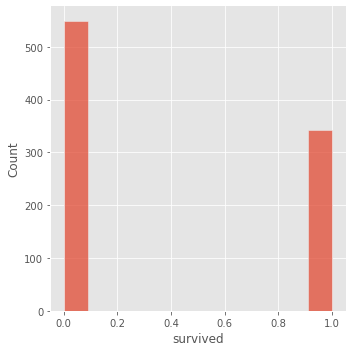

In [36]:
data.drop('class', axis = 1, inplace = True)
sns.displot(data['survived'])

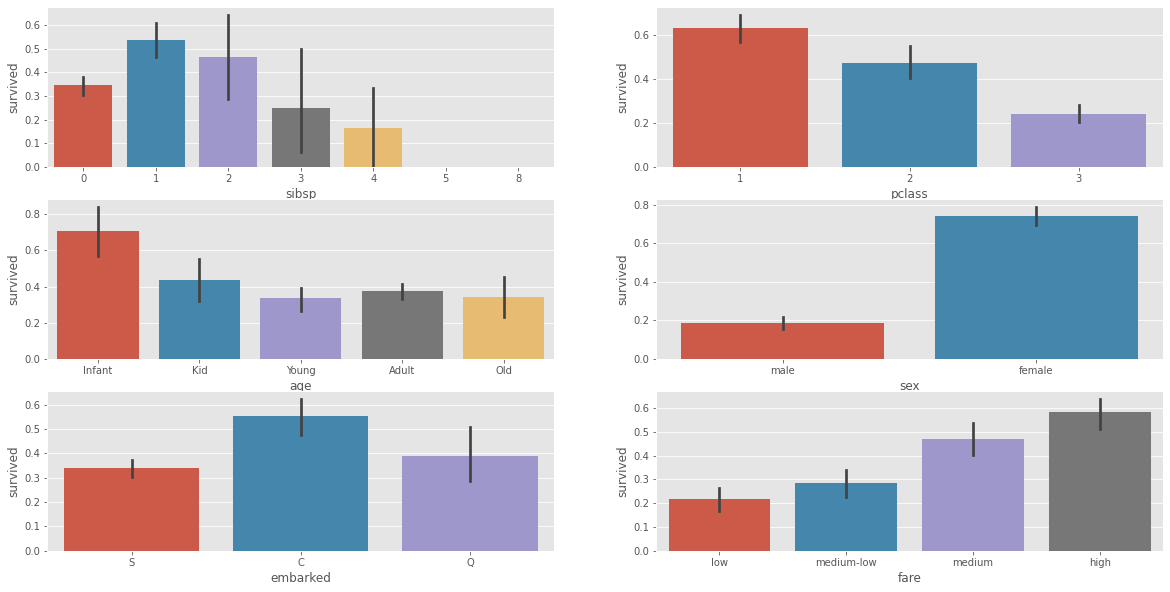

In [37]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data)
plt.subplot(322)
sns.barplot(x = 'pclass', y = 'survived', data = data)
plt.subplot(323)
sns.barplot(x = 'age', y = 'survived', data = data)
plt.subplot(324)
sns.barplot(x = 'sex', y = 'survived', data = data)
plt.subplot(325)
sns.barplot(x = 'embarked', y = 'survived', data = data);
plt.subplot(326)
sns.barplot(x = 'fare', y = 'survived' , data = data);

## We'll use get_dummies to convert non-numeric values to numeric values.

In [38]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummies_data = pd.get_dummies(data[dummies])

In [39]:
dummies_data.shape

(891, 14)

### We will concat two data frames, and drop the old columns.

In [40]:
data = pd.concat([data, dummies_data], axis = 1)
data.drop(dummies, axis = 1, inplace = True)

# Spliting into Train and Test dataset

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [42]:
X = data.drop('survived', axis = 1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## Training the model

In [43]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

array([0.        , 0.17021277, 0.        , 1.        , 1.        ,
       0.6       , 1.        , 1.        , 1.        , 1.        ,
       0.        , 0.91666667, 0.11764706, 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.17857143, 1.        ,
       0.08333333, 1.        , 0.11764706, 0.6       , 0.5       ,
       1.        , 0.17021277, 0.57142857, 1.        , 0.        ,
       0.        , 0.91666667, 0.17857143, 0.1       , 0.        ,
       0.5       , 0.17021277, 0.14285714, 0.08333333, 0.        ,
       0.        , 0.5       , 0.17857143, 0.        , 1.        ,
       0.17021277, 0.17021277, 1.        , 0.14285714, 0.        ,
       0.6       , 1.        , 1.        , 0.04347826, 0.5       ,
       0.        , 0.4       , 0.        , 0.        , 0.        ,
       0.5       , 0.        , 1.        , 0.25      , 0.        ,
       0.11764706, 0.66666667, 0.6       , 1.        , 0.66666667,
       1.        , 0.4       , 0.75      , 0.17857143, 0.     

# Accuracy of the model

In [49]:
import numpy as np

In [50]:
# Using RMSLE => Root Mean Square Logarithmic Error
error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
error

0.12359600065868188

In [51]:
# Accuracy of the model.
# Subtract error from 1 and multiplying by 100.

print("Accuracy of the model is", (1-error)*100, "%")

Accuracy of the model is 87.6403999341318 %
